In [11]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


with open('experiment2.out') as fh:
    out = fh.read()

out = re.split(r'\n\n\n', out); out[0]; out.pop()

''

In [12]:
def find_numbers(x):
    rawlist = re.findall(r'(\d+)\s|(\d+)\.(\d+)', x)
    numlist = []
    for g in rawlist:
        if g[0] != '':
            numlist.append(float(g[0]))
        if g[1] != '':
            numlist.append(float(g[1]+'.'+g[2]))
    return numlist[:8]+numlist[10:]

In [13]:
def dictionary_creator(x):
    return_dict = dict()
    var = ['n-source','n-target','dimension','prop-of-success-target','dist-between-means','iter_index','prediction_error','bayes_error','w_error','bandwidth','target_proportion','target_prop_error']
    for index, num in zip(var, x):
        return_dict[index] = num
    return return_dict

In [14]:
out_list = [find_numbers(x) for x in out]

In [15]:
df_out = pd.DataFrame(out_list, columns=['n-source','n-target','dimension','target-prop','dist-between-means','iter-index','prediction-error','bayes-error','w-error','bandwidth','target-prop','target-prop-error','NaN'])
df_out = df_out.iloc[:9901, :-1]
df_out['excess-risk'] = np.absolute(df_out['prediction-error'] - df_out['bayes-error'])

In [16]:
df_out

,n-source,n-target,dimension,target-prop,dist-between-means,iter-index,prediction-error,bayes-error,w-error,bandwidth,target-prop,target-prop-error,excess-risk
0,25.0,500.0,5.0,0.8,0.5,36.0,0.652,0.185,0.793271,1.328283,0.385714,0.414286,0.467
1,25.0,500.0,5.0,0.8,0.5,24.0,0.787,0.191,2.060078,0.944444,0.144000,0.656000,0.596
2,25.0,500.0,5.0,0.8,0.5,96.0,0.823,0.177,2.494932,1.846465,0.126000,0.674000,0.646
3,25.0,500.0,5.0,0.8,0.5,90.0,0.298,0.218,0.348000,0.541414,0.762000,0.038000,0.080
4,25.0,500.0,5.0,0.8,0.5,18.0,0.581,0.185,1.426184,0.100000,0.398000,0.402000,0.396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,3200.0,500.0,5.0,0.8,0.5,61.0,0.186,0.186,0.004548,0.886869,0.831298,0.031298,0.000
793,3200.0,500.0,5.0,0.8,0.5,91.0,0.194,0.194,0.012184,1.942424,0.761600,0.038400,0.000
794,3200.0,500.0,5.0,0.8,0.5,55.0,0.205,0.204,0.007029,1.904040,0.774807,0.025193,0.001
795,3200.0,500.0,5.0,0.8,0.5,79.0,0.188,0.190,0.006390,1.251515,0.784555,0.015445,0.002


Text(0.5, 0.98, '')

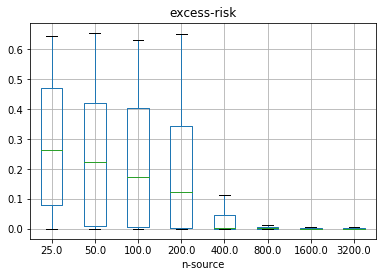

In [17]:
box = df_out.boxplot(column=['excess-risk'],by = 'n-source', showfliers='')
#box.set_yscale('log')
plt.suptitle('')

Text(0.5, 0.98, '')

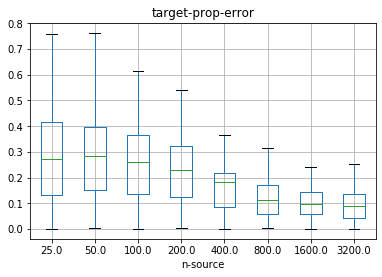

In [18]:
box = df_out.boxplot(column=['target-prop-error'],by = 'n-source', showfliers='')
#box.set_yscale('log')
plt.suptitle('')